In [1]:
# import packages
import pandas as pd
import numpy as np
import sklearn
import sklearn.neighbors
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import numpy as np

#lemmatization libraries 
import nltk.stem
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# punctuation + stop words libraries:
from nltk.corpus import stopwords
import re, string, timeit

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#stemming 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

## 1(a) Parsing the txt files:

## Question 1(a): Parsing Yelp, IMDB, and Amazon database:

#### Parsing Yelp

In [5]:
df_yelp = pd.read_csv("yelp_labelled.txt", sep="\t", header=None, names=["sentence", "label"])

How many values are there? How many positive and negative emotions (0/1)?

In [6]:
df_yelp.label.value_counts()

1    500
0    500
Name: label, dtype: int64

#### Parsing IMDB

In [9]:
df_imdb = pd.read_csv("imdb_labelled.txt", sep=" \t", header=None, names=["sentence", "label"])
#Notice: IMDB required another space in order to parse the 1000 lines because it was badly formatted

<ipython-input-9-0a2494051e90>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_imdb = pd.read_csv("imdb_labelled.txt", sep=" \t", header=None, names=["sentence", "label"])


How many values are there? How many positive and negative emotions (0/1)?

In [10]:
df_imdb.label.value_counts()

1    500
0    500
Name: label, dtype: int64

#### Parsing Amazon 

In [11]:
df_amazon = pd.read_csv("amazon_cells_labelled.txt", sep="\t", header=None, names=["sentence", "label"])

How many values are there? How many positive and negative emotions (0/1)?

In [12]:
df_amazon.label.value_counts()

1    500
0    500
Name: label, dtype: int64

#### Results - Amazon, IMDB and Yelp are balanced (50% negative 50% positive)
    

## Question 2(b): Preprocessing

Pick your preprocessing strategy. Since these sentences are online reviews, they may contain significant amounts of noise and garbage. You may or may not want to do one or all of
the following.

• Lowercase all of the words.

• Lemmatization of all the words (i.e., convert every word to its root so that all of “running,”
“run,” and “runs” are converted to “run” and and all of “good,” “well,” “better,” and “best”
are converted to “good”; this is easily done using nltk.stem).

• Strip punctuation.

• Strip the stop words, e.g., “the”, “and”, “or”.

• Something else? Tell us about it.

#### Step 1: Lowercase all databases

In [13]:
df_yelp["sentence"] = df_yelp["sentence"].str.lower()

In [14]:
df_imdb["sentence"] = df_imdb["sentence"].str.lower()

In [15]:
df_amazon["sentence"] = df_amazon["sentence"].str.lower()

#### Step 2: Punctuation Strip

In [16]:
#function that removes punctuation:
def remove_punctuation(sentence):
    sentence = re.sub(r'[^\w\s]','',sentence)
    return(sentence)

In [17]:
df_yelp["sentence"] = df_yelp['sentence'].apply(remove_punctuation)

In [18]:
df_imdb["sentence"] = df_imdb['sentence'].apply(remove_punctuation)

In [19]:
df_amazon["sentence"] = df_amazon['sentence'].apply(remove_punctuation)

#### Step 3: Strip the stop words, e.g., “the”, “and”, “or”

In [20]:
stop = stopwords.words('english')

In [21]:
df_yelp['sentence'] = df_yelp['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [22]:
# make sure there are no stop words in the database:
# df_yelp["sentence"].str.contains("the", na=False)

In [23]:
df_imdb['sentence'] = df_imdb['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [24]:
df_amazon['sentence'] = df_amazon['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#### Step 4: Lemmatiation of words

Defining:

In [25]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
wnl = WordNetLemmatizer()

Define a function that returns a lemmatized sentence:

In [26]:
def lemmatize_text(text):
    list2 = nltk.word_tokenize(text)
    lemmatized_sentence = ' '.join([wnl.lemmatize(words) for words in list2])
    return(lemmatized_sentence)

Apply "lemmatization" on the "sentence" column on all datasets:

In [27]:
df_yelp['sentence'] = df_yelp['sentence'].apply(lambda x: lemmatize_text(x))
df_imdb['sentence'] = df_imdb['sentence'].apply(lambda x: lemmatize_text(x))
df_amazon['sentence'] = df_amazon['sentence'].apply(lambda x: lemmatize_text(x))

#### Step 5 (extra): stemming

We decided to add stemming because it is helps us to achieve the root forms (synonyms) of inflected words.

In [31]:
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [43]:
def stemming(text):
    w_list = text.split()
    stem_list = []
    for word in w_list:
        stemmed_word = porter.stem(word)
        stem_list.append(stemmed_word)
    stemmed_sentence = ' '.join(stem_list)
    return(stemmed_sentence)

Apply "stemming" on the "sentence" column on all datasets:

In [50]:
df_yelp['sentence'] = df_yelp['sentence'].apply(lambda x: stemming(x))
df_imdb['sentence'] = df_yelp['sentence'].apply(lambda x: stemming(x))
df_amazon['sentence'] = df_yelp['sentence'].apply(lambda x: stemming(x))

## 2(C): Split training and test data

For each file use the first 400 instances for each label as the training set and the remaining 100 instances as testing set.

In total, there are 2400 reviews for training and 600 reviews for testing.

#### Yelp - Divide to positive and negative data set and extract from there the train / test datasets:

In [54]:
# Divide into positive / negative datasets:
df_yelp_pos = df_yelp[df_yelp['label'] == 1].reset_index(drop=True)   # positive emotion = 1
df_yelp_neg = df_yelp[df_yelp['label'] == 0].reset_index(drop=True)   # Negative emotion = 0

# For the positive dataset - divide into train / test datasets:
df_yelp_train_pos = df_yelp_pos[:400]
df_yelp_test_pos = df_yelp_pos[400:500]

# For the negative dataset - divide into train / test datasets:
df_yelp_train_neg = df_yelp_neg[:400]
df_yelp_test_neg = df_yelp_neg[400:500]

#### IMDB - Divide to positive and negative data set and extract from there the train / test datasets:

In [55]:
# Divide into positive / negative datasets:
df_imdb_pos = df_imdb[df_imdb['label'] == 1].reset_index(drop=True)   # positive emotion = 1
df_imdb_neg = df_imdb[df_imdb['label'] == 0].reset_index(drop=True)   # Negative emotion = 0

# For positive - train / test datasets:
df_imdb_train_pos = df_imdb_pos[:400]
df_imdb_test_pos = df_imdb_pos[400:500]

# For the negative dataset - divide into train / test datasets:
df_imdb_train_neg = df_imdb_neg[:400]
df_imdb_test_neg = df_imdb_neg[400:500]

#### Amazon - Divide to positive and negative data set and extract from there the train / test datasets:

In [56]:
# Divide into positive / negative datasets:
df_amazon_pos = df_amazon[df_amazon['label'] == 1].reset_index(drop=True)   # positive emotion = 1
df_amazon_neg = df_amazon[df_amazon['label'] == 0].reset_index(drop=True)   # Negative emotion = 0

# For positive - train / test datasets:
df_amazon_train_pos = df_amazon_pos[:400]
df_amazon_test_pos = df_amazon_pos[400:500]

# For the negative dataset - divide into train / test datasets:
df_amazon_train_neg = df_amazon_neg[:400]
df_amazon_test_neg = df_amazon_neg[400:500]

### Concat - train_df & test_df:

In [57]:
df_train = pd.concat([df_amazon_train_neg, df_amazon_train_pos, df_yelp_train_neg, df_yelp_train_pos,
                                   df_imdb_train_neg, df_imdb_train_pos], ignore_index=True)

#self check
len(df_train)

2400

In [58]:
df_test = pd.concat([df_amazon_test_neg, df_amazon_test_pos, df_yelp_test_neg, df_yelp_test_pos,
                                   df_yelp_test_neg, df_yelp_test_pos], ignore_index=True)

#self check
len(df_test)

600

## Question 2(d)

Bag of Words model.

Extract features and then represent each review using bag of words model, i.e., every word in the review becomes its own element in a feature vector. 
In order to do this, first, make one pass through all the reviews in the training set (Explain why we can’t
use testing set at this point) and build a dictionary of unique words. 
Then, make another pass through the review in both the training set and testing set and count up the occurrences of
each word in your dictionary. 
The i-th element of a review’s feature vector is the number of occurrences of the ith dictionary word in the review. 
Implement the bag of words model and report feature vectors of any two reviews in the training set. 


#### Create a dictionary with all unique words:

In [59]:
# Dictionary with all unique words and their count:
word_freq = defaultdict(int)
for row in range(0,len(df_train)):
    for i in df_train['sentence'][row].split():
        word_freq[i] += 1

#print(word_freq)

In [66]:
def feature_vector_func(sentence):
    feature_vector = {x:0 for x in word_freq} # Put 0-s instead of counting every unique word
    word_list = sentence.split()
    counter = 0
    for word in word_freq:
        if word in word_list:
            feature_vector[word] = counter + 1
        else:
            feature_vector[word] = counter
    return(feature_vector)

#### Applying the function to all rows in df_train to get all feature vectors:

In [67]:
df_train['feature_vector_dict'] = df_train['sentence'].apply(lambda x: feature_vector_func(x))

In [68]:
df_train.head()

,sentence,label,feature_vector_dict
0,wow love place,0,"{'wow': 1, 'love': 1, 'place': 1, 'stop': 0, '..."
1,stop late may bank holiday rick steve recommen...,0,"{'wow': 0, 'love': 1, 'place': 0, 'stop': 1, '..."
2,get angri want damn pho,0,"{'wow': 0, 'love': 0, 'place': 0, 'stop': 0, '..."
3,honeslti didnt tast fresh,0,"{'wow': 0, 'love': 0, 'place': 0, 'stop': 0, '..."
4,fri great,0,"{'wow': 0, 'love': 0, 'place': 0, 'stop': 0, '..."


#### Applying the function to all rows in the same manner for df_test:

In [69]:
df_test['feature_vector_dict'] = df_test['sentence'].apply(lambda x: feature_vector_func(x))

In [70]:
df_test.head()

,sentence,label,feature_vector_dict
0,servic fair best,0,"{'wow': 0, 'love': 0, 'place': 0, 'stop': 0, '..."
1,favor stay away dish,0,"{'wow': 0, 'love': 0, 'place': 0, 'stop': 0, '..."
2,poor servic,0,"{'wow': 0, 'love': 0, 'place': 0, 'stop': 0, '..."
3,one tabl thought food averag worth wait,0,"{'wow': 0, 'love': 0, 'place': 0, 'stop': 0, '..."
4,best servic food ever maria server good friend...,0,"{'wow': 0, 'love': 0, 'place': 0, 'stop': 0, '..."


#### Compare any two feature vectors of any two reviews in the training set:

In [71]:
df_train['feature_vector_dict'][:2]

0    {'wow': 1, 'love': 1, 'place': 1, 'stop': 0, '...
1    {'wow': 0, 'love': 1, 'place': 0, 'stop': 1, '...
Name: feature_vector_dict, dtype: object

## Question 2(e) - Pick your postprocessing strategy

#### We chose to use the 4th method - standardize the data by subtracting the mean and dividing by the variance.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. 

However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. 

So, even if you have outliers in your data, they will not be affected by standardization.

In [72]:
#Function that converts the dict "feature_vector" into an array:
def dict_to_array(vector):
    data = list(vector.values())
    an_array = np.array(data)
    return(an_array)

In [73]:
# data = list(df_train['feature_vector'][1].values())
# an_array = np.array(data)
# print(an_array)

In [74]:
df_train['feature_vector_array'] = df_train['feature_vector_dict'].apply(lambda x: dict_to_array(x))

In [78]:
# #self check - ignore
# arr_2 = df_train['feature_vector_array'][2]
# for i in arr_2:
#     if i == 1:
#         print(i)

# df_train['sentence'][2]

In [81]:
#function that gets "df_train['array_vector'][i]", and returns the standardized array:
def standard(dataset):
    standardized_array = (dataset - np.average(dataset)) / (np.std(dataset))
    return(standardized_array)

In [82]:
df_train['standard_array'] = df_train['feature_vector_array'].apply(lambda x: standard(x))

In [83]:
#self check - ignore
df_train['standard_array'][0]

array([22.61268081, 22.61268081, 22.61268081, ..., -0.04422297,
       -0.04422297, -0.04422297])

In [84]:
#self check 
# for i in df_train['standard_array'][1]:
#     if i != -0.04606127153588057:
#         print(i, df_train.index)

In [85]:
df_train.head()

,sentence,label,feature_vector_dict,feature_vector_array,standard_array
0,wow love place,0,"{'wow': 1, 'love': 1, 'place': 1, 'stop': 0, '...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[22.612680808195506, 22.612680808195506, 22.61..."
1,stop late may bank holiday rick steve recommen...,0,"{'wow': 0, 'love': 1, 'place': 0, 'stop': 1, '...","[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[-0.07674667651449762, 13.029880190461377, -0...."
2,get angri want damn pho,0,"{'wow': 0, 'love': 0, 'place': 0, 'stop': 0, '...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[-0.057128868112378745, -0.057128868112378745,..."
3,honeslti didnt tast fresh,0,"{'wow': 0, 'love': 0, 'place': 0, 'stop': 0, '...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.051080944423879705, -0.051080944423879705,..."
4,fri great,0,"{'wow': 0, 'love': 0, 'place': 0, 'stop': 0, '...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.03609614378422167, -0.03609614378422167, -..."


### For the test data:

In [86]:
df_test['feature_vector_array'] = df_test['feature_vector_dict'].apply(lambda x: dict_to_array(x))
df_test['standard_array'] = df_test['feature_vector_array'].apply(lambda x: standard(x))

In [87]:
len(df_test['standard_array'][1])

1537

## Question 2(f) - Sentiment Prediction

Train a naive Bayes model on the training set and test on the testing set. 

Report the classification accuracy and confusion matrix.

In [88]:
train_X = df_train["standard_array"]
test_X = df_test["standard_array"]

In [89]:
train_X = pd.DataFrame(train_X.to_list())
test_X = pd.DataFrame(test_X.to_list())

In [90]:
train_X = train_X.to_numpy()
test_X = test_X.to_numpy()

In [91]:
train_Y = df_train['label']
test_Y = df_test['label']

In [93]:
#self check
train_X

array([[22.61268081, 22.61268081, 22.61268081, ..., -0.04422297,
        -0.04422297, -0.04422297],
       [-0.07674668, 13.02988019, -0.07674668, ..., -0.07674668,
        -0.07674668, -0.07674668],
       [-0.05712887, -0.05712887, -0.05712887, ..., -0.05712887,
        -0.05712887, -0.05712887],
       ...,
       [-0.06260197, -0.06260197, -0.06260197, ..., -0.06260197,
        -0.06260197, -0.06260197],
       [-0.04422297, -0.04422297, 22.61268081, ..., -0.04422297,
        -0.04422297, -0.04422297],
       [-0.04422297, -0.04422297, -0.04422297, ..., -0.04422297,
        -0.04422297, -0.04422297]])

In [94]:
n = train_X.shape[0] #number of rows
d = train_X.shape[1] #number of unique words = features in feature vector
K = 2 #number of classes - label 1 or label 0

In [95]:
psis = np.zeros([K,d])
phis = np.zeros([K])

In [96]:
for k in range(K):
    X_k = train_X[train_Y == k]
    phis[k] = X_k.shape[0] / float(n)
    psis[k] = np.mean(X_k, axis=0) #build a function with the mean for label 0 and mean for label 0 as an array

In [97]:
# print(psis.shape, phis.shape, train_X.shape)

In [98]:
# we can implement this in numpy
def nb_predictions(x, psis, phis):
    """This returns class assignments and scores under the NB model.
    
    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y)
    """
    # adjust shapes
    n , d = x.shape
    x = np.reshape(x, (1,n,d))
    psis = np.reshape(psis, (K, 1, d))
    
    # clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14) #understand
    
    # compute log-probabilities
    logpy = np.log(phis).reshape(K,1)
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

### Naive Bayes on the Training Set

In [106]:
predicted, logpyx = nb_predictions(train_X, psis, phis)

### Accuracy calculation:

In [107]:
(predicted == train_Y).mean()

0.6408333333333334

In [108]:
predicted #len(idx)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

### Naive Bayes on the Data Set

In [109]:
predicted_test, logpyx_test = nb_predictions(test_X, psis, phis)

### Accuracy for test data:

In [111]:
(predicted_test == test_Y).mean()

0.61

### Confusion matrix:

In [123]:
actual = test_Y
predictions = predicted_test

In [124]:
actual.shape

(600,)

In [125]:
predictions.shape

(600,)

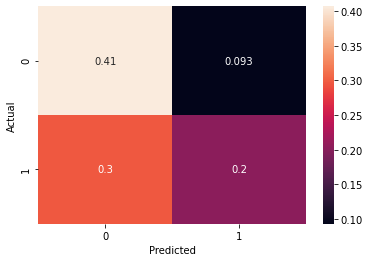

In [130]:
# get actual and create heatmap 
confusion_matrix = pd.crosstab(actual, predictions , rownames=['Actual'], colnames=['Predicted'], normalize=True)
plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True)

## Question 2(g): Logistic Regression